In [36]:
import numpy as np
import matplotlib.pyplot as plt
import json
from collections import Counter


import sys
sys.path.append('../')
sys.path.append('../phase')
from phase.input_output import PhaseData
from phase.qc import OutlierDetector

In [37]:
#data_dir = '../../DATA/ssc.hg38'
data_dir = '../../DATA/platinum'
#phase_name = 'X'
phase_name = None
#phase_name = 'noDEL'

colors = ['#4db6acff', '#ef6c00ff', '#b3a77dff', '#695d46ff', '#ce93d8ff', '#009668ff', ]

In [38]:
phase_data = PhaseData(data_dir, phase_name)
sibpairs = phase_data.get_sibpairs()
print('sibpairs', len(sibpairs))

crossovers = phase_data.get_crossovers()
print('crossovers', len(crossovers))

sibpairs 54
crossovers 7072


In [39]:
crossover_lengths = np.array([co['end_pos']-co['start_pos'] for co in crossovers])
is_mat = np.array([co['is_mat'] for co in crossovers])
is_hts = np.array([co['is_hts'] for co in crossovers])

In [40]:
mat_crossovers = np.array([x['maternal_crossovers'] for x in sibpairs if x['is_fully_phased']])
pat_crossovers = np.array([x['paternal_crossovers'] for x in sibpairs if x['is_fully_phased']])

is_ibd_outlier = np.array([x['is_ibd_outlier'] for x in sibpairs if x['is_fully_phased']])
is_outlier = np.array([x['is_crossover_outlier'] for x in sibpairs if x['is_fully_phased']])

print('outliers', np.sum(is_outlier))

x_min, x_max = np.min(mat_crossovers[~is_ibd_outlier])-5, np.max(mat_crossovers[~is_ibd_outlier])+5
y_min, y_max = np.min(pat_crossovers[~is_ibd_outlier])-5, np.max(pat_crossovers[~is_ibd_outlier])+5


outliers 3


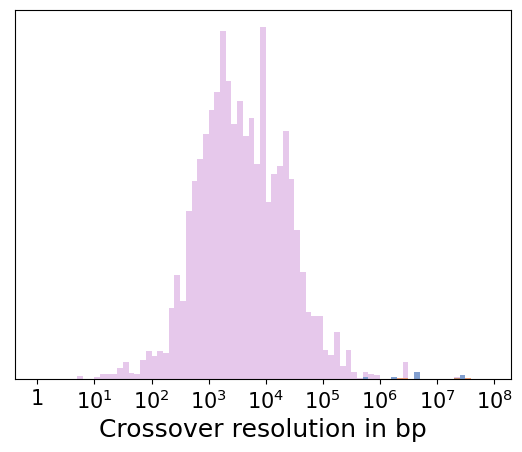

In [41]:
plt.hist(np.log10(crossover_lengths), 
         alpha=0.5, bins=np.arange(0, 8, 0.1), color=colors[4])
plt.hist(np.log10(crossover_lengths[is_hts & is_mat]), 
         alpha=0.5, bins=np.arange(0, 8, 0.1))
plt.hist(np.log10(crossover_lengths[is_hts & ~is_mat]), 
         alpha=0.5, bins=np.arange(0, 8, 0.1))

plt.xlabel('Crossover resolution in bp', fontsize=18)
plt.xticks(np.arange(0, 9), ['1' if i==0 else '$10^{%d}$' % i for i in np.arange(0, 9)], fontsize=15)
plt.yticks([])
plt.show()

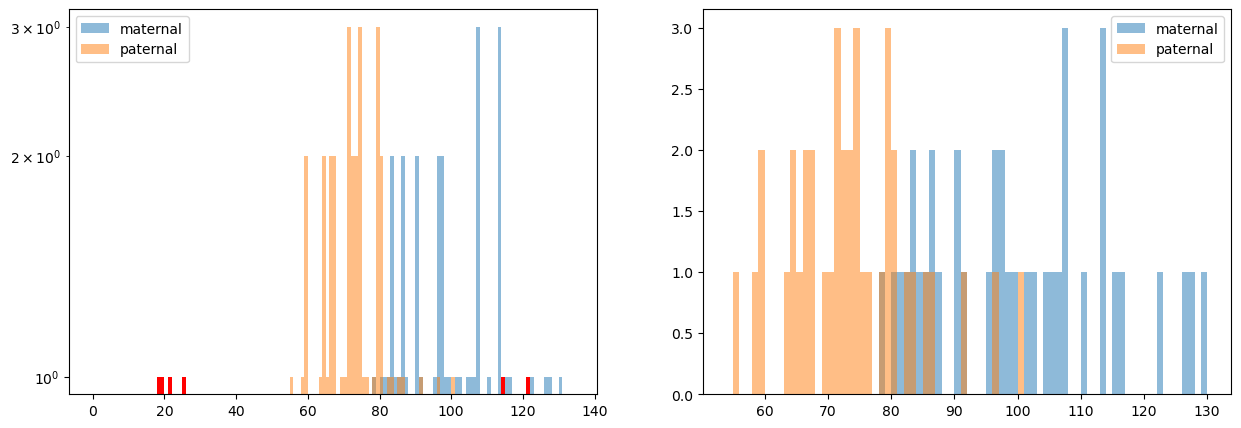

In [42]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist(mat_crossovers, bins=np.arange(max(x_max, y_max)), alpha=0.5, label='maternal', log=True)
plt.hist(pat_crossovers, bins=np.arange(max(x_max, y_max)), alpha=0.5, label='paternal', log=True)
plt.hist(mat_crossovers[is_outlier], bins=np.arange(max(x_max, y_max)), color='red', log=True)
plt.hist(pat_crossovers[is_outlier], bins=np.arange(max(x_max, y_max)), color='red', log=True)
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(mat_crossovers[~is_outlier], bins=np.arange(np.min(pat_crossovers[~is_outlier])-1, np.max(mat_crossovers[~is_outlier])+1), 
         alpha=0.5, label='maternal')
plt.hist(pat_crossovers[~is_outlier], bins=np.arange(np.min(pat_crossovers[~is_outlier])-1, np.max(mat_crossovers[~is_outlier])+1), 
         alpha=0.5, label='paternal')
plt.legend()
plt.show()

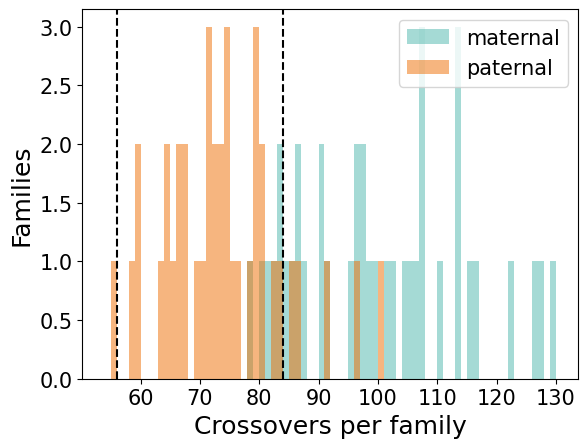

In [43]:
plt.hist(mat_crossovers[~is_outlier], bins=np.arange(np.min(pat_crossovers[~is_outlier])-1, np.max(mat_crossovers[~is_outlier])+1, 1), 
         alpha=0.5, label='maternal', color=colors[0])
plt.hist(pat_crossovers[~is_outlier], bins=np.arange(np.min(pat_crossovers[~is_outlier])-1, np.max(mat_crossovers[~is_outlier])+1, 1), 
         alpha=0.5, label='paternal', color=colors[1])
plt.legend(fontsize=15)
plt.xlabel('Crossovers per family', fontsize=18)
plt.xticks(fontsize=15)
plt.ylabel('Families', fontsize=18)
plt.yticks(fontsize=15)

if phase_name is None:
    plt.axvline(84, color='black', linestyle='--')
    plt.axvline(56, color='black', linestyle='--')

plt.savefig('../plots/crossover_count.png', bbox_inches="tight")


In [44]:
print(sibpairs[0])

{'family': 'NA1281.NA12879.NA12880', 'sibling1': 'NA12879', 'sibling2': 'NA12880', 'is_fully_phased': False, 'maternal_ibd': None, 'maternal_unknown_fraction': None, 'paternal_ibd': None, 'paternal_unknown_fraction': None, 'matxpat_ibd': None, 'matxpat_unknown_fraction': None, 'is_identical': None, 'maternal_ibd_chroms': [0.12131186345781116, 0.30062435039950475, 0.6646282898088942, 0.3704130367155597, 0.535098058262745, 0.7396069124079921, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None], 'maternal_unknown_fraction_chroms': [0.0035920552574753876, 0.001063773306125149, 0.0006565266402221539, 0.0008086243428246635, 0.0008596842569260562, 0.0010134700821726591, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None], 'paternal_ibd_chroms': [0.5421199069430063, 0.21703777687668985, 0.4530540408245462, 0.4722662501568905, 0.9846578626496116, 0.4684717096978408, None, None, None, None, None, 

In [45]:
print(np.median(mat_crossovers[~is_outlier]))
print(np.median(pat_crossovers[~is_outlier]))

print(np.mean(mat_crossovers[~is_outlier]))
print(np.mean(pat_crossovers[~is_outlier]))

98.0
73.0
99.6923076923077
73.48717948717949


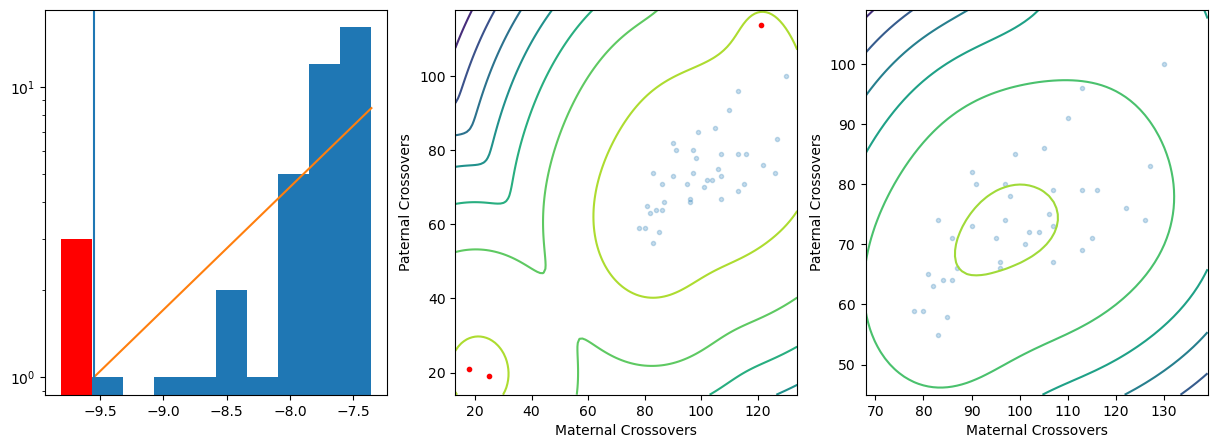

In [46]:
is_way_out = (mat_crossovers > 3*np.median(mat_crossovers)) | (pat_crossovers > 3*np.median(pat_crossovers))
detector = OutlierDetector(mat_crossovers[~is_ibd_outlier & ~is_way_out], 
                           pat_crossovers[~is_ibd_outlier & ~is_way_out], 10)
scores = detector.score_samples(mat_crossovers, pat_crossovers)
outlier_cutoff, m, b = detector.outlier_cutoff, detector.m, detector.b
bins = detector.bins

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(np.clip(scores, min(bins[0], outlier_cutoff), bins[-1]), bins=bins, log=True)
plt.hist(np.clip(scores[is_outlier], min(bins[0], outlier_cutoff), bins[-1]), bins=bins, log=True, color='red')
plt.plot([outlier_cutoff, bins[-1]], [np.exp(m*outlier_cutoff+b), np.exp(m*bins[-1]+b)])
plt.axvline(outlier_cutoff)

plt.subplot(1, 3, 2)
xintervals = np.arange(x_min, x_max)
yintervals = np.arange(y_min, y_max)
gridx, gridy = np.meshgrid(xintervals, yintervals)
predict = detector.score_samples(gridx.flatten(), gridy.flatten())
plt.contour(xintervals, yintervals, predict.reshape(len(yintervals), len(xintervals)))

plt.scatter(mat_crossovers, pat_crossovers, marker='.', alpha=0.25)
plt.scatter(mat_crossovers[is_outlier], pat_crossovers[is_outlier], marker='.', color='red')
plt.xlabel('Maternal Crossovers')
plt.ylabel('Paternal Crossovers')

plt.subplot(1, 3, 3)
xintervals = np.arange(np.min(mat_crossovers[~is_outlier])-10, np.max(mat_crossovers[~is_outlier])+10)
yintervals = np.arange(np.min(pat_crossovers[~is_outlier])-10, np.max(pat_crossovers[~is_outlier])+10)
gridx, gridy = np.meshgrid(xintervals, yintervals)
predict = detector.score_samples(gridx.flatten(), gridy.flatten())
plt.contour(xintervals, yintervals, predict.reshape(len(yintervals), len(xintervals)))

plt.scatter(mat_crossovers[~is_outlier], pat_crossovers[~is_outlier], marker='.', alpha=0.25)
plt.xlabel('Maternal Crossovers')
plt.ylabel('Paternal Crossovers')

plt.show()

In [47]:
print(mat_crossovers[is_outlier])
print(pat_crossovers[is_outlier])
print(scores[is_outlier])

[121  18  25]
[114  21  19]
[-9.81027095 -9.58721958 -9.58721958]


In [48]:
print(np.max(mat_crossovers[~is_outlier]))

130


In [49]:
print(Counter([x['chrom'] for x in crossovers if x['is_hts']]))

Counter({'1': 10, '7': 10, '8': 2, '16': 2, '4': 2, '22': 1, '9': 1, '2': 1})
